In [1]:
import uproot3 as uproot
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def getValues(file):
    Values={}
    with uproot.open(file) as f:
        tree = f['event_tree']#metadata = f['metadata']
        branches = [
    
            # event number
            'event',
            
            # generator info
            'generator_initial_number_particles', 'generator_initial_particle_pdg_code',
            'generator_initial_particle_px', 'generator_initial_particle_py', 'generator_initial_particle_pz',
            'generator_initial_particle_energy',
            'generator_final_number_particles', 'generator_final_particle_pdg_code',
            'generator_final_particle_px', 'generator_final_particle_py', 'generator_final_particle_pz',
            'generator_final_particle_energy',
    
            # MC particle information [Q_PIX_GEANT4]
            'number_particles', 'particle_track_id', 'particle_pdg_code',
            'particle_mass', 'particle_initial_energy','particle_initial_x','particle_initial_y','particle_initial_z',
    
            # MC hit information [Q_PIX_GEANT4]
            'number_hits','hit_energy_deposit', 'hit_track_id', 'hit_process_key',
            'hit_start_x', 'hit_start_y', 'hit_start_z', 'hit_start_t','hit_process_key',
            'hit_end_x', 'hit_end_y', 'hit_end_z', 'hit_end_t','Elocx','Elocy','Elocz'
        ]
      
        for brn in branches:
            Values[brn]=tree[brn].array()
        
    return Values    

def ConvertTo1dArray(vects,limit=5000):
    d1Array=[]
    count=0
    for x in vects:
        k=np.array(x).flatten()
        d1Array=np.append(d1Array,k)
        count+=1
        if(count==limit):
            break
    print(d1Array)
    return d1Array


def RotateAndOffset(x,offset):
    x=-1*x
    x=offset+x
    return x

def PlotArray(PosX,PosY,Title,AxisTitX,AxisTitY,fsize=(20,12),res=300):
    plt.figure(figsize=fsize, dpi=res)
    for X,Y in zip(PosX,PosY):
        plt.scatter(X,Y,color='red')
        plt.plot(X,Y,color='blue')
    
    plt.title(Title)
    plt.xlabel(AxisTitX)
    plt.ylabel(AxisTitY)
    

In [3]:
'''z8=getValues("electron_8cm.root")
z6=getValues("electron_6cm.root")
z4=getValues("electron_4cm.root")
'''
z10=getValues("electron_10cm_50Vcm_1bar_.root")
z2=getValues("electron_2cm_50Vcm_1bar_.root")


/home/ilker/.local/lib/python3.9/site-packages/awkward0/array/base.py:398: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return cls.numpy.array(value, copy=False)


In [4]:
Ey_z10=ConvertTo1dArray(z10["Elocy"],90)
#Ey_z8=ConvertTo1dArray(z8["Elocy"])
#Ey_z6=ConvertTo1dArray(z6["Elocy"])
#Ey_z4=ConvertTo1dArray(z4["Elocy"])
Ey_z2=ConvertTo1dArray(z2["Elocy"],90)





[3.21494211 3.18531316 4.04192579 ... 3.76656149 3.8506578  3.56717486]
[4.40862557 3.21363083 3.93802514 ... 4.86312539 5.19414481 5.19820992]


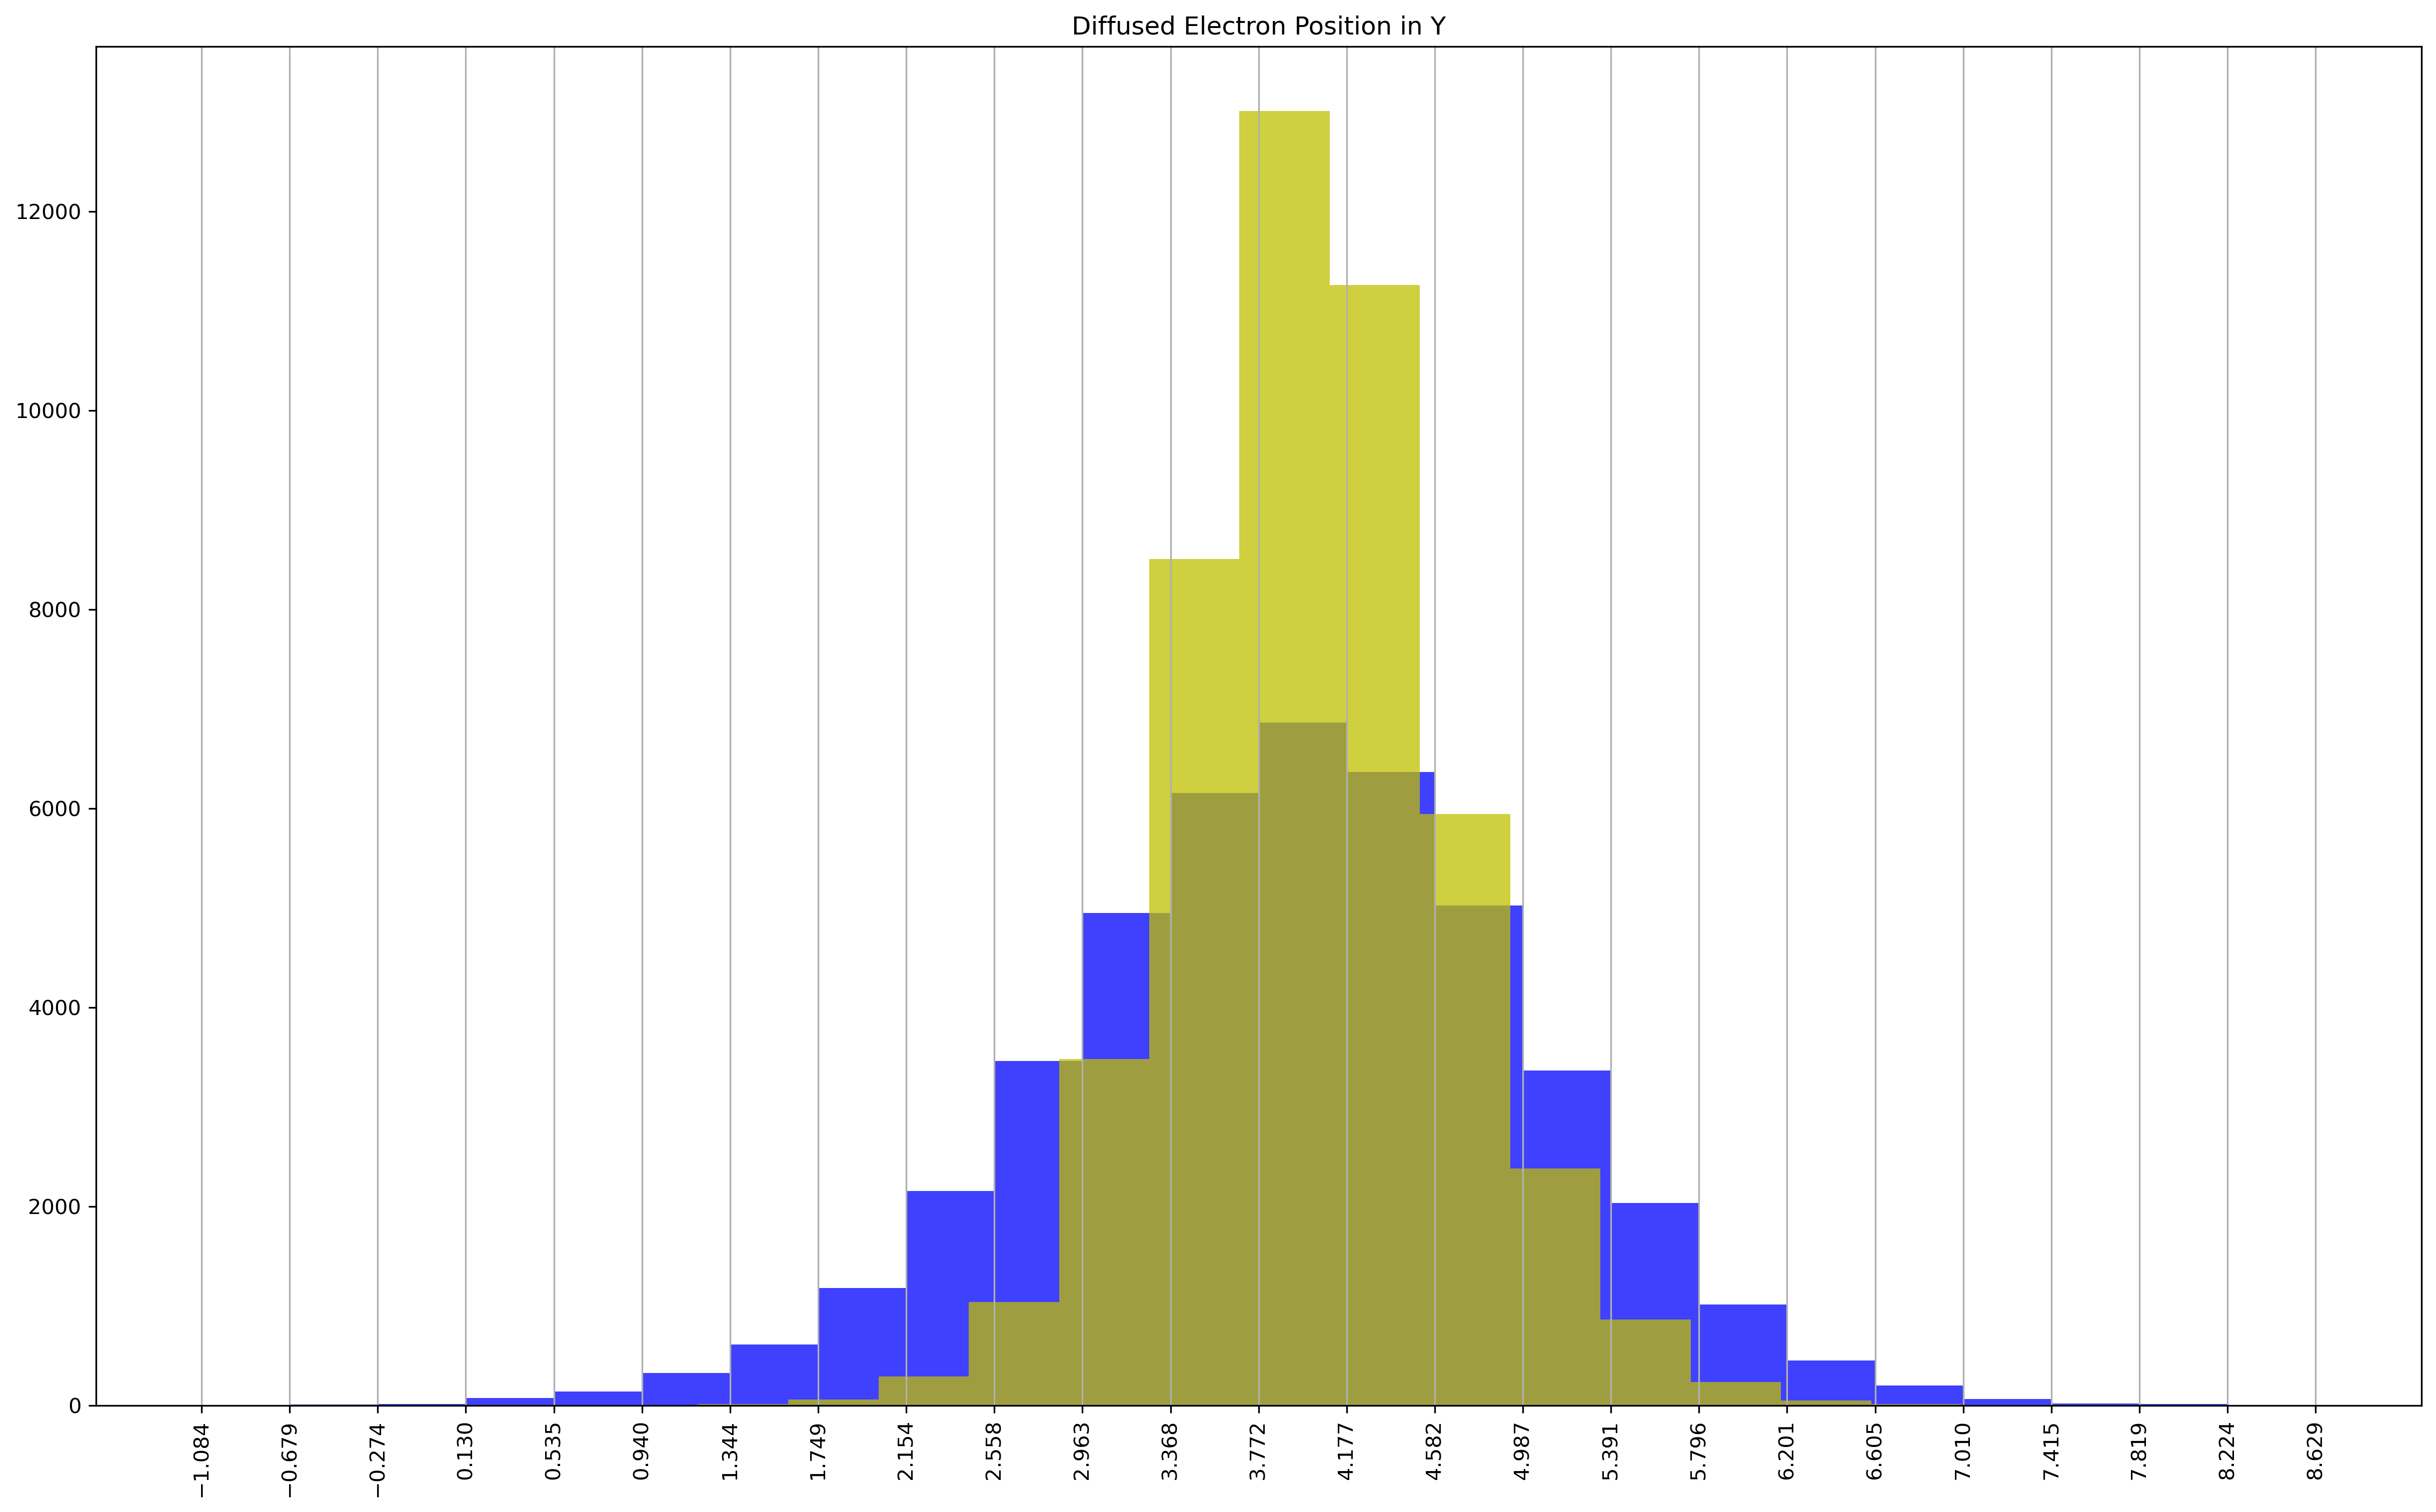

 Spacing is 4.146117438638141   in mm  @ 2 cm 
 Spacing is 4.04693922371524 in mm @ 10 cm 


In [5]:
plt.figure(figsize=(20,12), dpi=300)
plt.title("Diffused Electron Position in Y")
z10n, z10bins, z10patches = plt.hist(Ey_z10, 24, density=False, facecolor='b', alpha=0.75,label="10cm")
#plt.hist(Ey_z8, 25, density=True, facecolor='r', alpha=0.75,label='10cm')
#plt.hist(Ey_z6, 25, density=True, facecolor='b', alpha=0.75,label='10cm')
#plt.hist(Ey_z4, 25, density=True, facecolor='m', alpha=0.75,label='10cm')
z2n, z2bins, z2patches = plt.hist(Ey_z2, 15, density=False, facecolor='y', alpha=0.75,label="2cm")

plt.xticks(z10bins,rotation=90)
plt.xlabel
plt.grid(True,axis='x')
plt.show()
print(f" Spacing is {abs(z2bins[0]-z2bins[1])*10}   in mm  @ 2 cm ")
print(f" Spacing is {abs(z10bins[0]-z10bins[1])*10} in mm @ 10 cm ")

In [6]:
alphas=getValues("alpha.root")
electrons=getValues("electron.root")



In [7]:
ElectronPositionX=RotateAndOffset(electrons["particle_initial_x"],7)
ElectronPositionY=RotateAndOffset(electrons["particle_initial_y"],4)

AlphasPositionX=RotateAndOffset(alphas["particle_initial_x"],7)
AlphasPositionY=RotateAndOffset(alphas["particle_initial_y"],4)


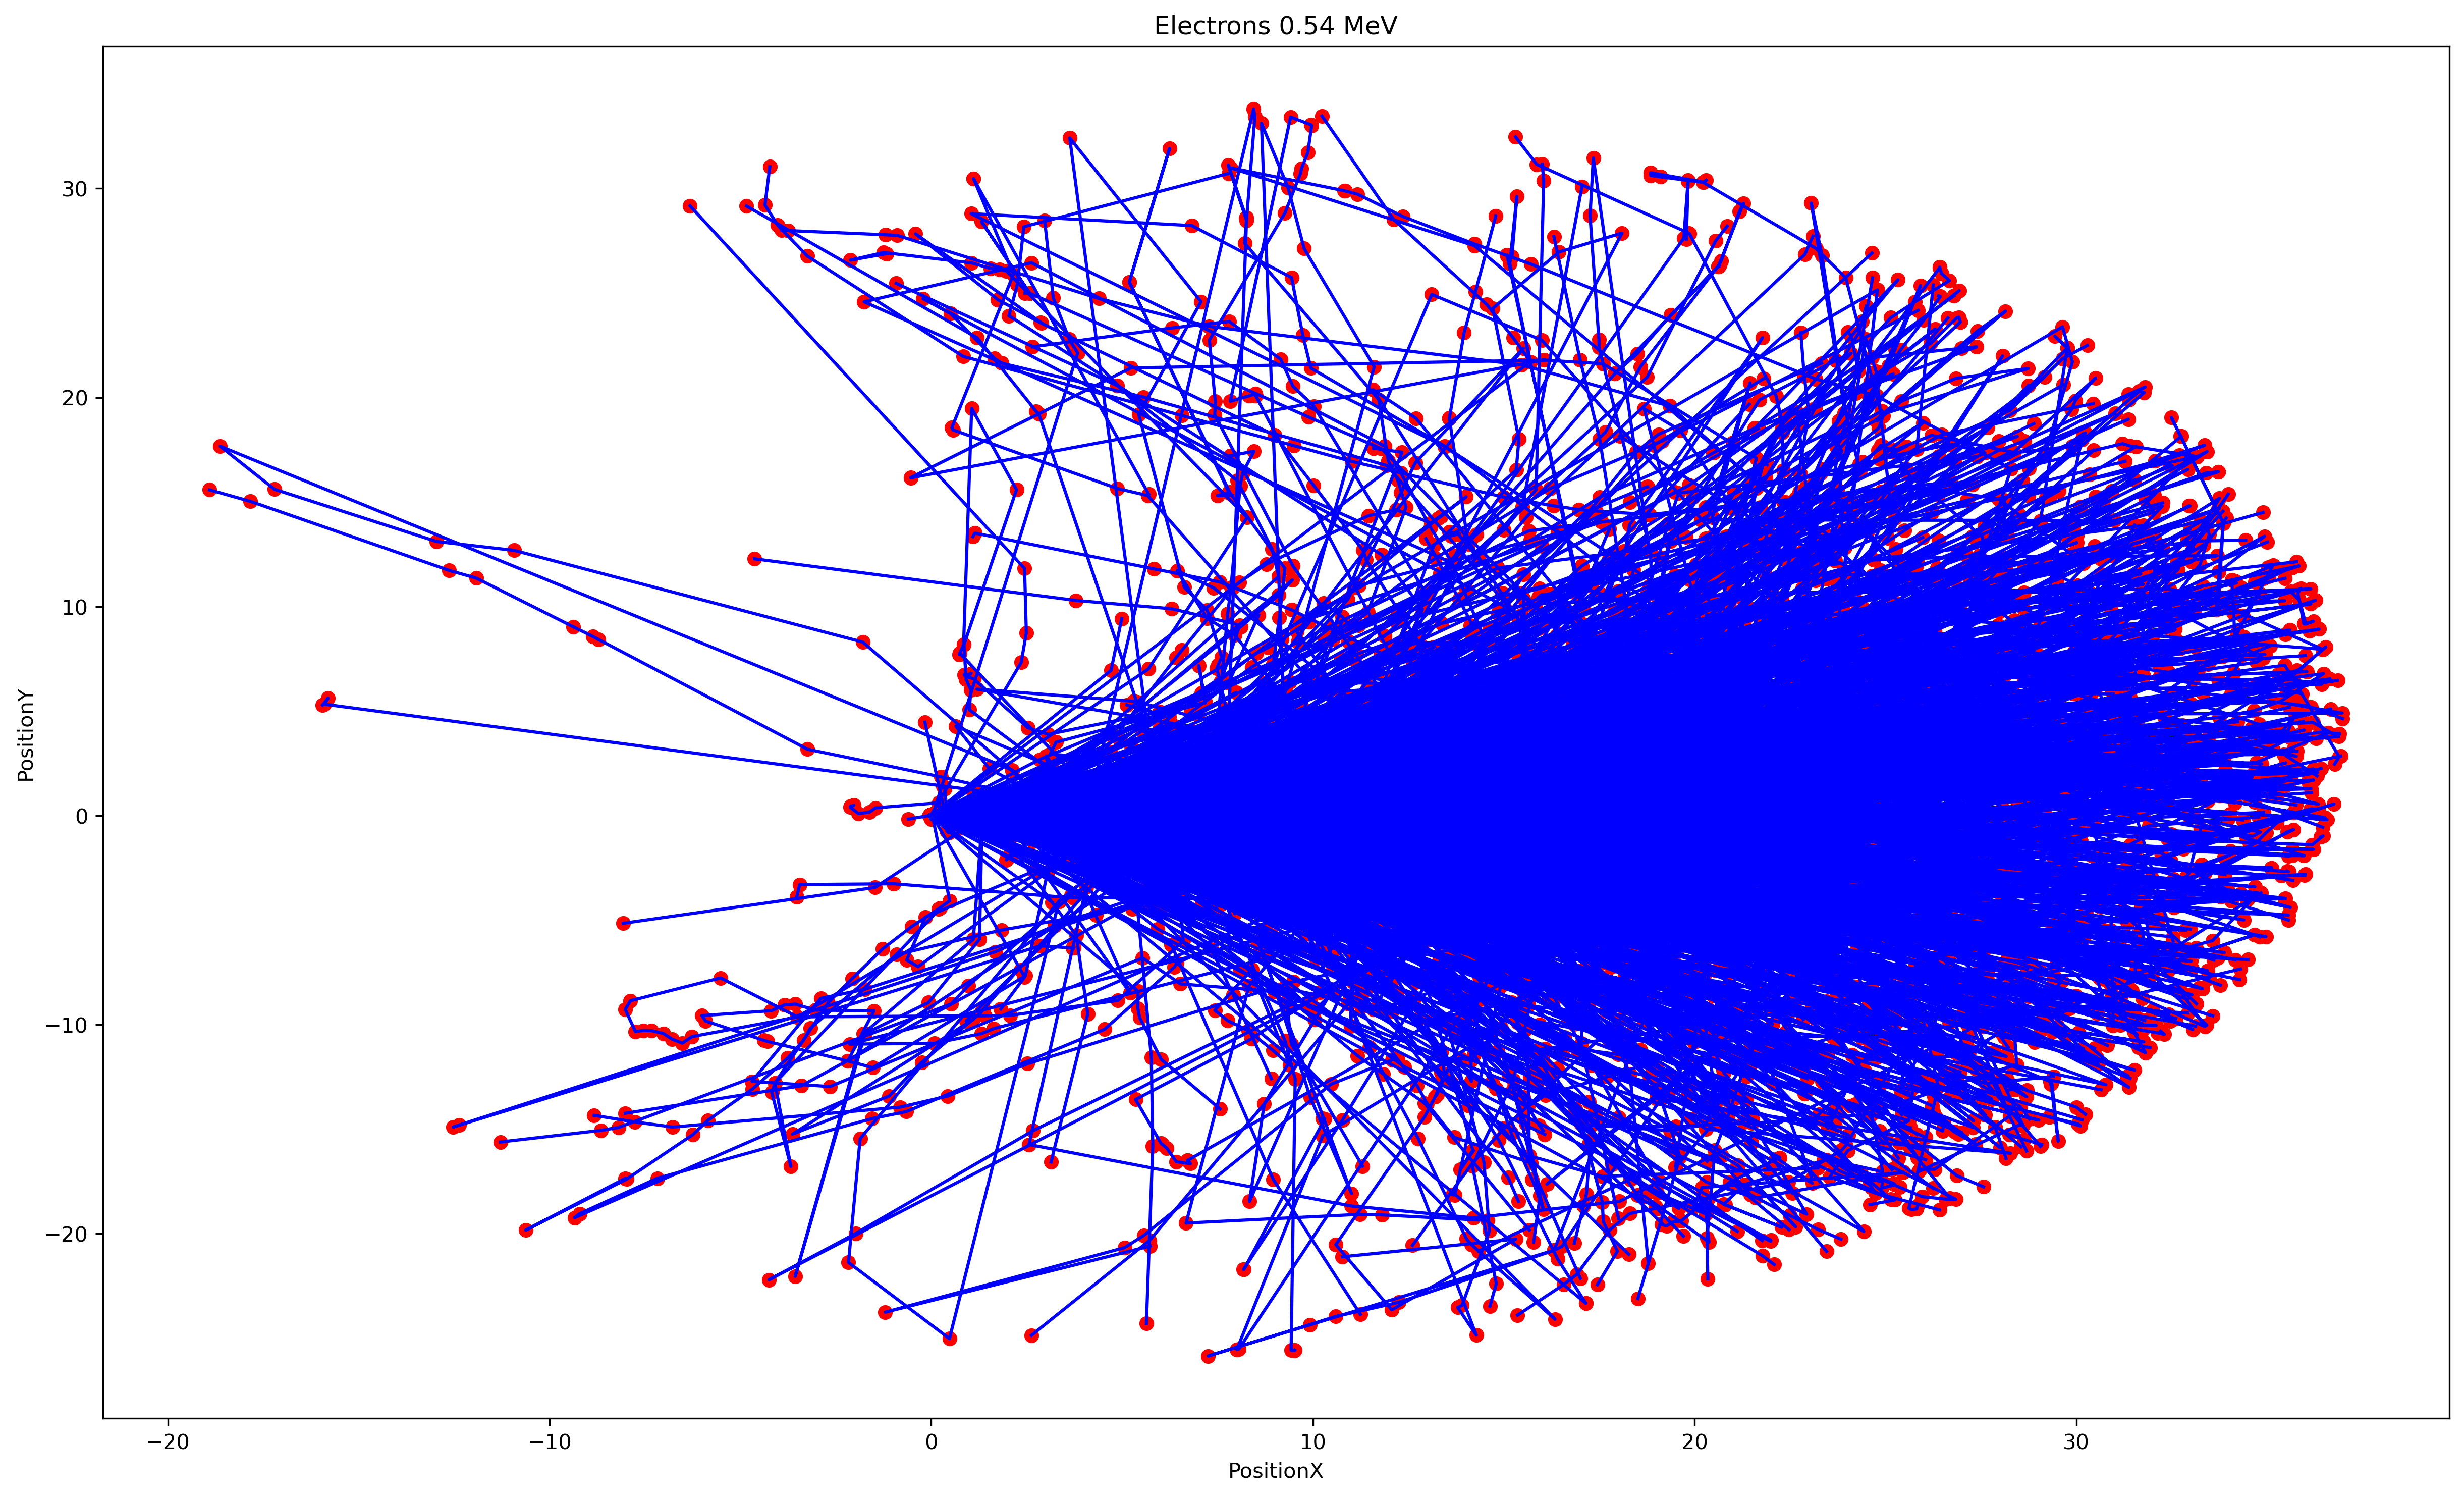

In [8]:
PlotArray(ElectronPositionX,ElectronPositionY,"Electrons 0.54 MeV","PositionX","PositionY")

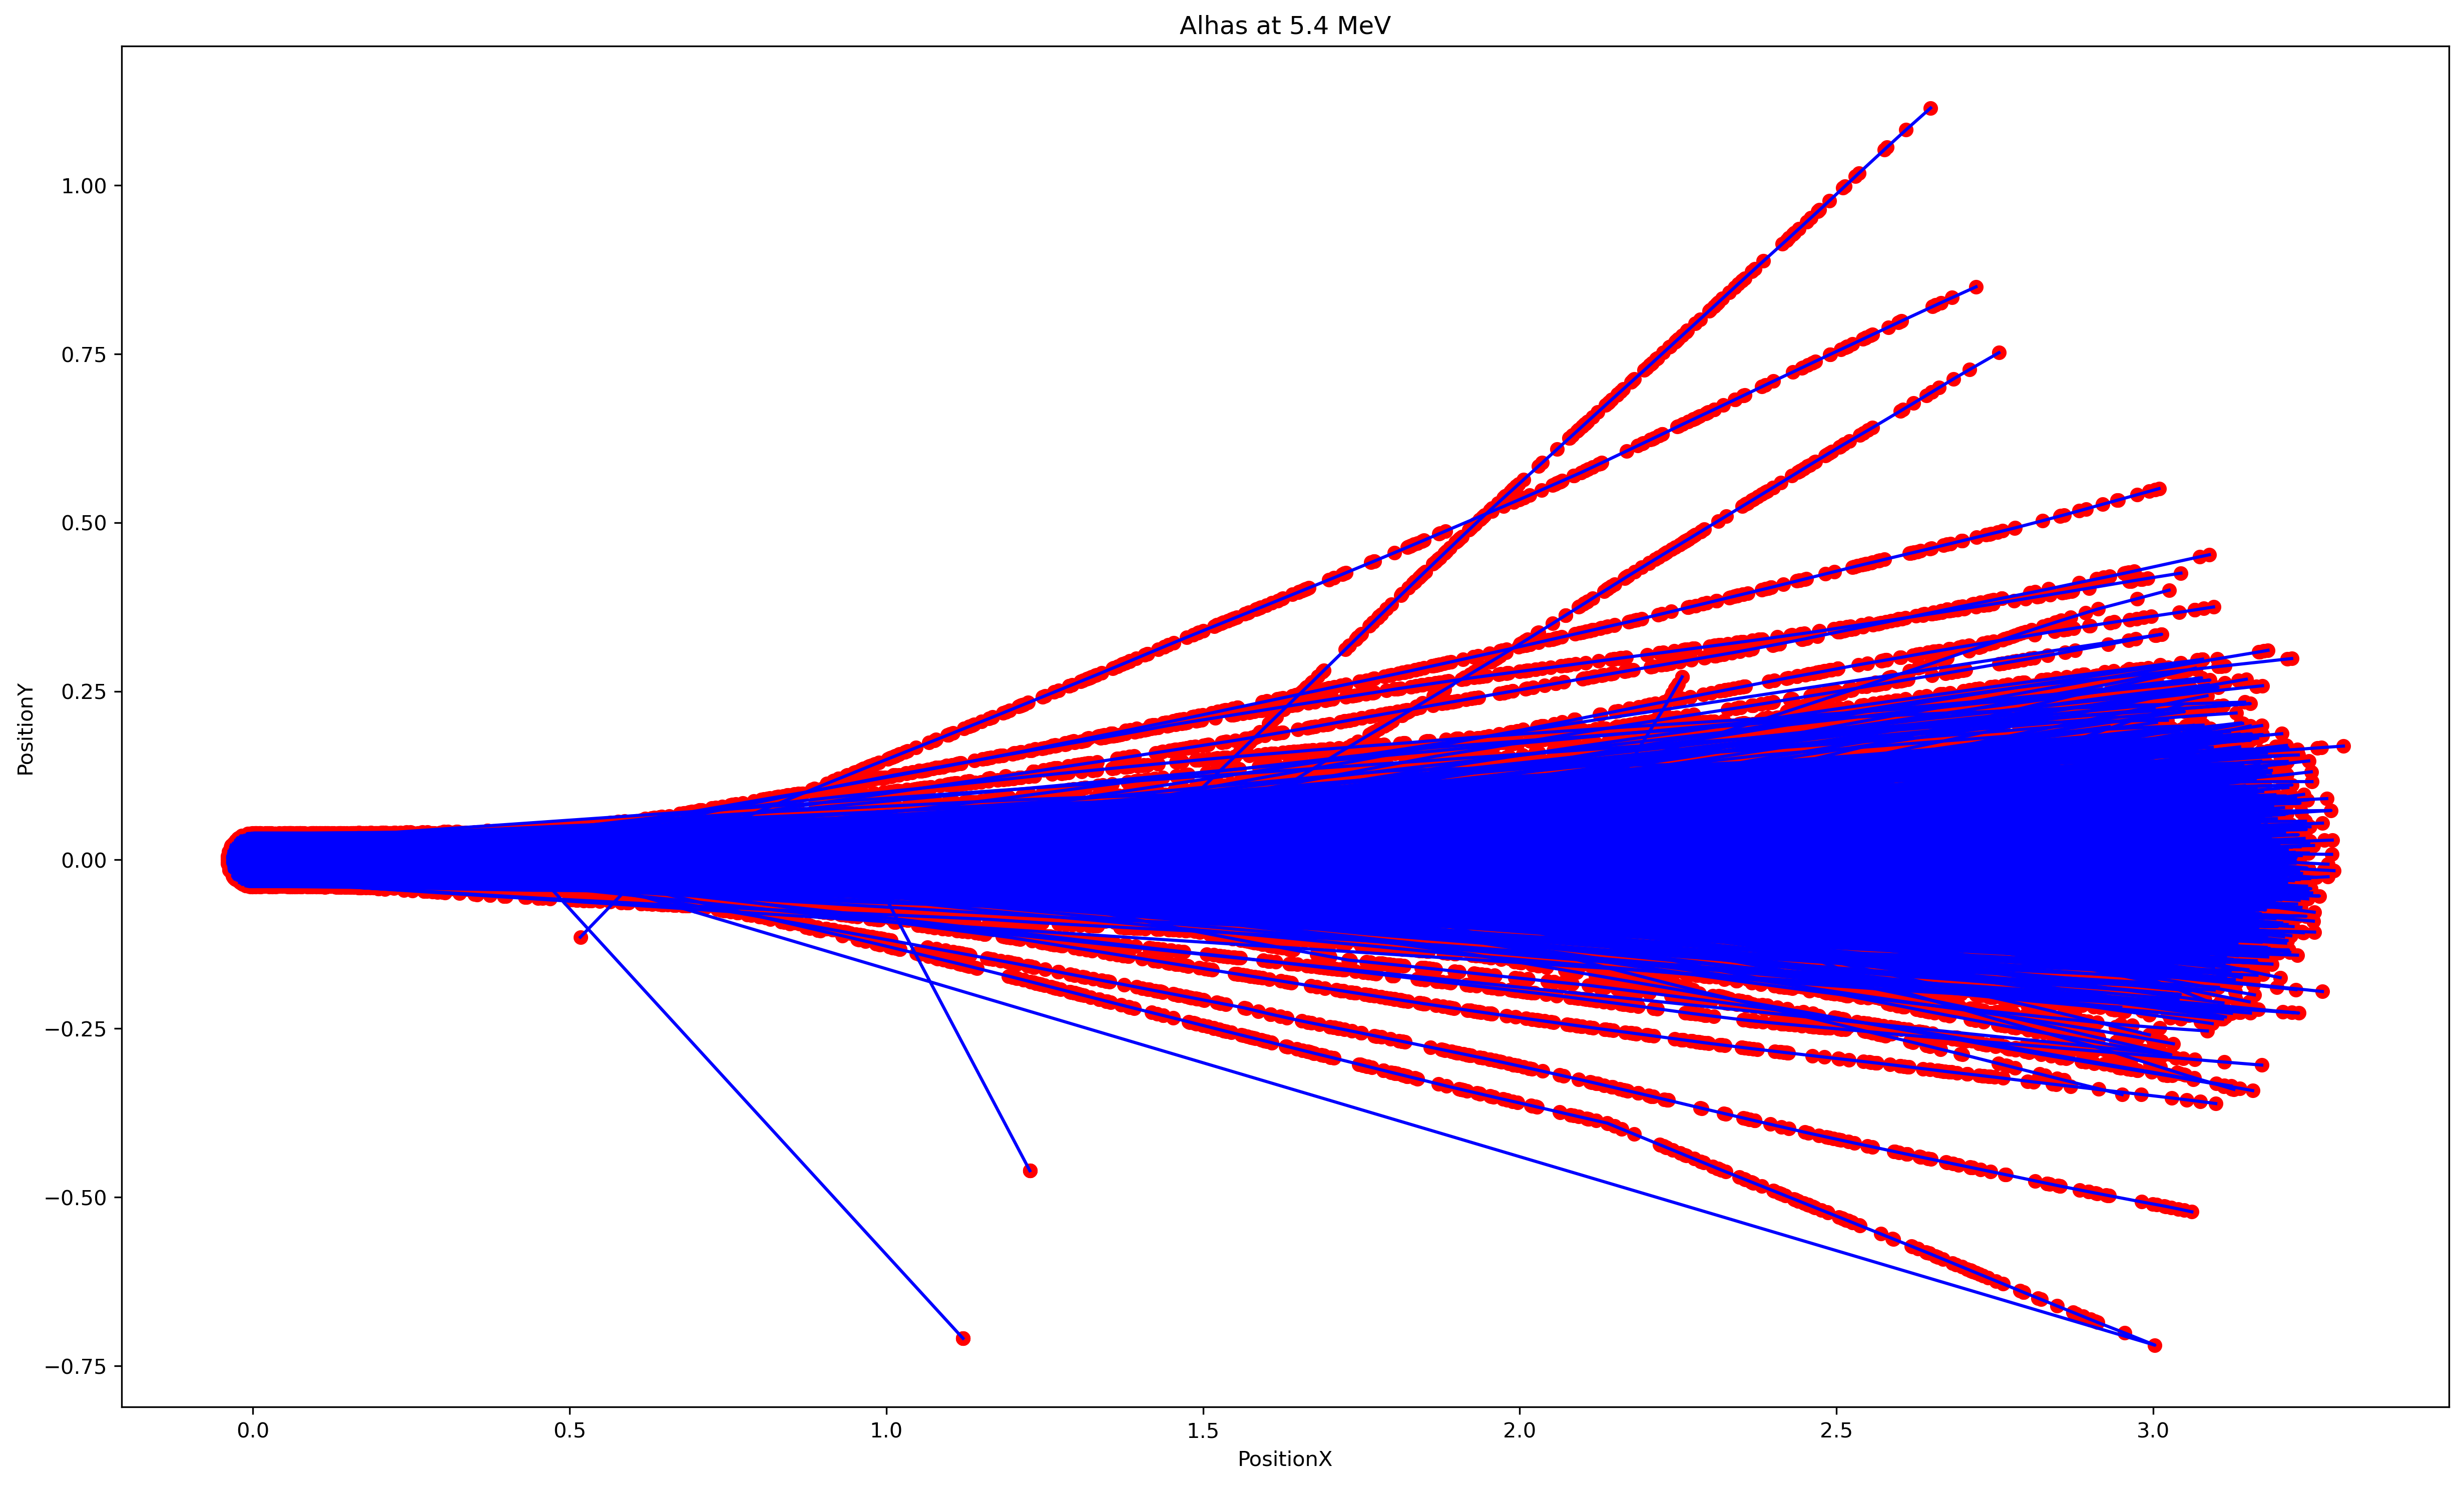

In [9]:
PlotArray(AlphasPositionX,AlphasPositionY,"Alhas at 5.4 MeV","PositionX","PositionY")